In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.datasets import imdb
from keras import layers

In [2]:
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

In [4]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_original = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 6s 94ms/step - loss: 0.5503 - accuracy: 0.7545 - val_loss: 0.4384 - val_accuracy: 0.8363
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3403 - accuracy: 0.8907 - val_loss: 0.3327 - val_accuracy: 0.8793
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2563 - accuracy: 0.9177 - val_loss: 0.2917 - val_accuracy: 0.8854
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2052 - accuracy: 0.9329 - val_loss: 0.2851 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1721 - accuracy: 0.9438 - val_loss: 0.2870 - val_accuracy: 0.8848
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1463 - accuracy: 0.9537 - val_loss: 0.2809 - val_accuracy: 0.8893
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1250 - accuracy: 0.9629 - val_loss: 0.2962 - val_accuracy: 0.8838
Epoch 8/20
30

In [5]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_smaller = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 63ms/step - loss: 0.6110 - accuracy: 0.7088 - val_loss: 0.5437 - val_accuracy: 0.8495
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4725 - accuracy: 0.8645 - val_loss: 0.4436 - val_accuracy: 0.8504
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3698 - accuracy: 0.9057 - val_loss: 0.3675 - val_accuracy: 0.8851
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2945 - accuracy: 0.9235 - val_loss: 0.3352 - val_accuracy: 0.8796
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2438 - accuracy: 0.9333 - val_loss: 0.2988 - val_accuracy: 0.8898
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2071 - accuracy: 0.9424 - val_loss: 0.3002 - val_accuracy: 0.8813
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1798 - accuracy: 0.9499 - val_loss: 0.2850 - val_accuracy: 0.8857
Epoch 8/20
30

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_larger = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 13s 420ms/step - loss: 0.5781 - accuracy: 0.7155 - val_loss: 0.3608 - val_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 13s 426ms/step - loss: 0.3242 - accuracy: 0.8691 - val_loss: 0.2851 - val_accuracy: 0.8825
Epoch 3/20
30/30 [==============================] - 24s 810ms/step - loss: 0.2342 - accuracy: 0.9079 - val_loss: 0.2682 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 13s 446ms/step - loss: 0.1889 - accuracy: 0.9260 - val_loss: 0.3097 - val_accuracy: 0.8757
Epoch 5/20
30/30 [==============================] - 12s 389ms/step - loss: 0.1392 - accuracy: 0.9484 - val_loss: 0.3729 - val_accuracy: 0.8535
Epoch 6/20
30/30 [==============================] - 12s 415ms/step - loss: 0.1140 - accuracy: 0.9616 - val_loss: 0.3224 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 9s 302ms/step - loss: 0.0796 - accuracy: 0.9741 - val_loss: 0.3518 - val_accuracy: 0.8835


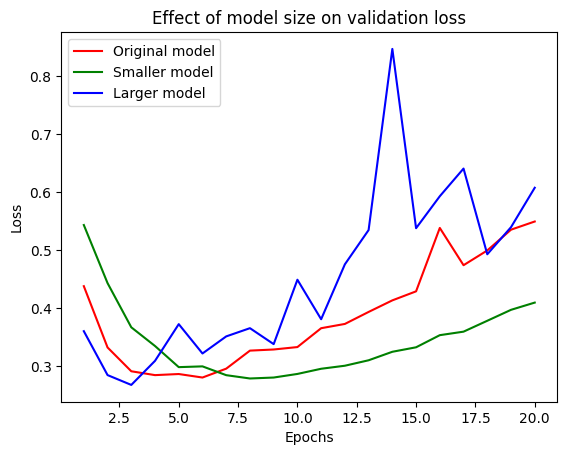

In [9]:
original_val_loss = history_original.history["val_loss"]
small_val_loss = history_smaller.history["val_loss"]
large_val_loss = history_larger.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, original_val_loss, "r-", label="Original model")
plt.plot(epochs, small_val_loss, "g-", label="Smaller model")
plt.plot(epochs, large_val_loss, "b-", label="Larger model")
plt.title("Effect of model size on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()